# Visualizing FordBike Data
## by Anubhav Nehru

## Investigation Overview

> In this investigation of the Ford GoBike System, I wanted to look at the most common customer behaviors and characteristics, specifically how user type, time, gender, and age impacts usage of the system.

## Dataset Overview

>Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of monthly individual trip data from June 2017 to December 2018 in CSV format covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

%matplotlib inline
os.chdir("C:/Users/anubh/OneDrive/Documents/Project/Udacity/Project 7/")
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("fordgo_master_clean.csv")
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_time,user_type,member_age,start_month_year,start_time_month,start_time_weekday,start_time_hour,end_time_hour,age_bins,duration_min
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,Male,...,2018-02-28 23:59:47.097,Subscriber,32.0,2018-02,February,Wed,23,0,26 - 35,9
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987.0,Male,...,2018-02-28 23:21:16.495,Customer,33.0,2018-02,February,Wed,23,23,26 - 35,15
2,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,1976.0,Female,...,2018-02-28 23:15:12.858,Subscriber,44.0,2018-02,February,Wed,23,23,36 - 45,14
3,2656,No,921,288.0,37.350964,-121.902016,Mission St at 1st St,2018-02-28 23:29:40.437,1997.0,Male,...,2018-02-28 23:14:19.170,Customer,23.0,2018-02,February,Wed,23,23,15 - 25,15
4,1616,No,277,310.0,37.335885,-121.885660,San Fernando St at 4th St,2018-02-28 23:26:27.222,1957.0,Female,...,2018-02-28 23:21:49.274,Subscriber,63.0,2018-02,February,Wed,23,23,56 - 66,4


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike Usage by Months

>  July is the peak month in which the bike service is used the most.Most of the trips are done from the month of April to July, which are the early summer months.

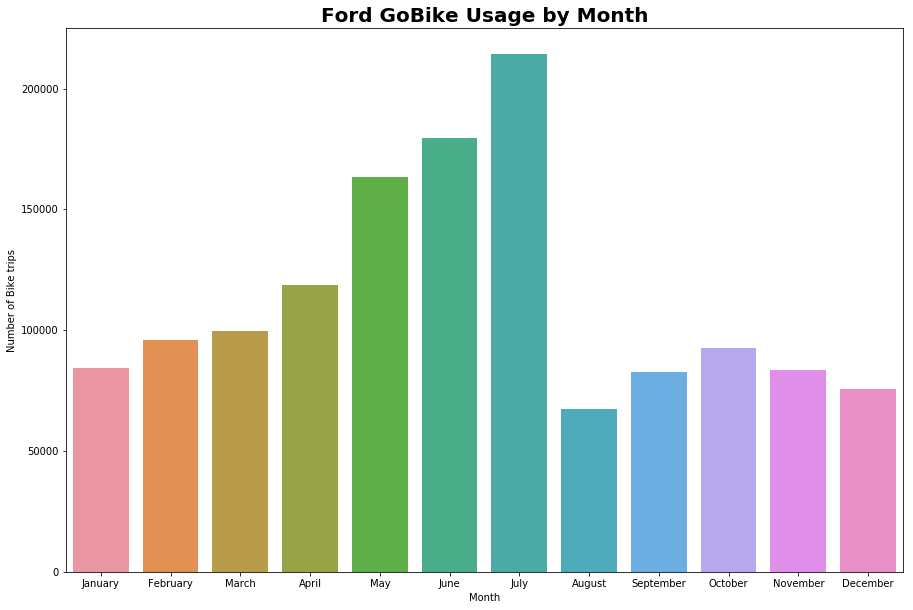

In [3]:
#usage by month
month = ["January" , "February" , "March" , "April" , "May" , "June" , "July" , "August" , "September" ,"October" ,"November" ,"December"];
plt.figure(figsize= (15,10));
sns.countplot(x = "start_time_month" , data = df  ,order=month);

plt.xlabel("Month");
plt.ylabel("Number of Bike trips");
plt.title('Ford GoBike Usage by Month' , fontweight = "bold" , fontsize = 20);

## Ford GoBike System Trip Duration in Minutes

>  The average trip is just under 9 minutes, with 75% of trips being under 13 minutes. Looking at the histogram, most rides fall in between the 3 - 15 minute range. This suggests riders are taking the bikes trips for short distances.

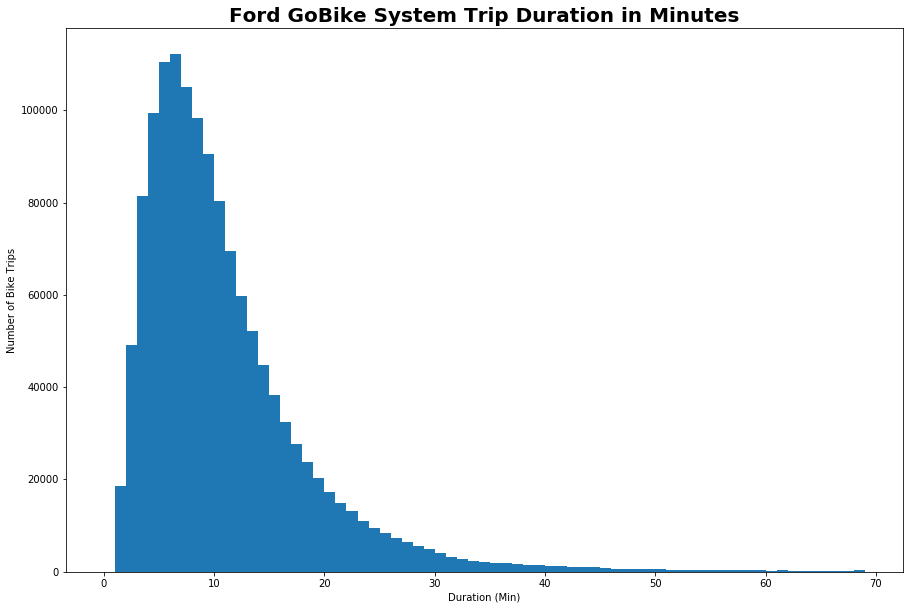

In [4]:
# Duration of the bike rides - in minutes
bin_edges = np.arange(0, 70 ,1)

plt.figure(figsize= (15,10))
plt.hist(data = df, x = 'duration_min', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Minutes", fontsize = 20, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips');

## Ford GoBike System Trends by User Type
> Customers have very less usage of bike service as compared to Subscribers.There is a slight increase in the usage by Customers on weekends ,which may be because the customers are tourists and visit SF on weekends or customers are casual users which use the service to roam around the city mostly on weekends.Subscribers have the highest usage of service in the weekdays and the usage dips in weekends.

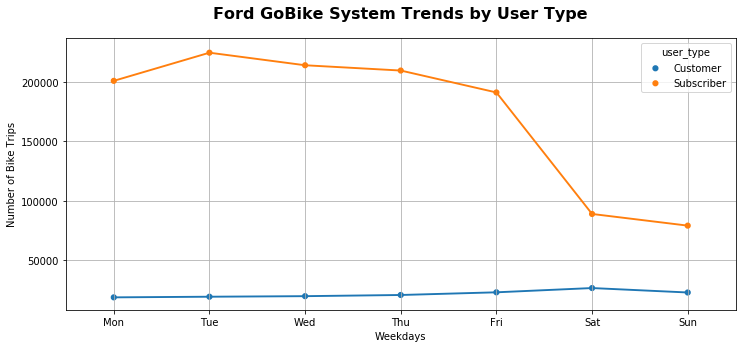

In [5]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

## Duration of bike trips by different genders
>Females are taking the longest trips(in minutes) among all the genders.Females trip duration falls between 15-17 minutes and males tend to take trips falling between 13-15 minutes. Most of the bike trips fall below 35 minutes of time, hence creating a scenario that the bike trips are usually used for shorter trips

Text(0.5, 1.0, 'Violin plot and boxplot of duration of bike trips by gender')

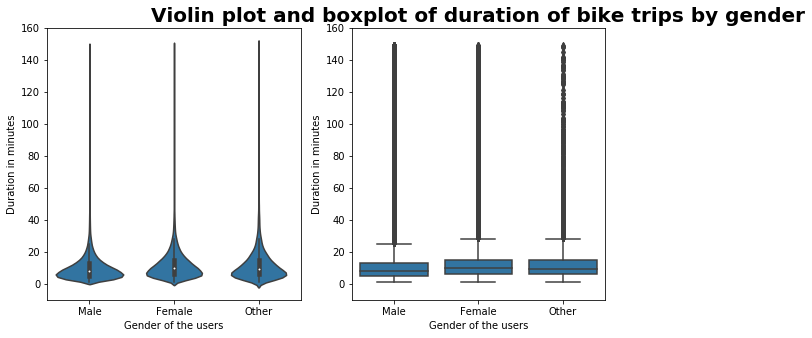

In [6]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(df["member_gender"] , df["duration_min"], color = base_color)
plt.xlabel("Gender of the users")
plt.ylabel("Duration in minutes")
# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(df["member_gender"] , df["duration_min"], color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xlabel("Gender of the users")
plt.ylabel("Duration in minutes")

plt.title("Violin plot and boxplot of duration of bike trips by gender" , loc = "center", fontweight = "bold" , fontsize = 20)

## Scatter plot of Member age and Duration of the trip wrt Member Gender

> Most of the users are Male ,followed by Females and Other users are the least.Users in the age gap 15-25 years ,tend to take bike trips of duration below 100 minutes .Users between age gap 26-35 years ,tend to take longer duration of trips below 140 minutes. Users in age group 36-45 mostly take trip duration below 120 minutes.Users in age group 46-55 take rides mostly below 100 minutes.People between 55-66 years take the most shortest rides, followed by people between 15-25 years.

In [7]:
age_order = ["15 - 25" , "26 - 35" , "36 - 45" , "46 - 55" , "56 - 66"]

Text(0.5, 1.0, 'Scatter plot of Member age and Duration of the trip wrt Member Gender')

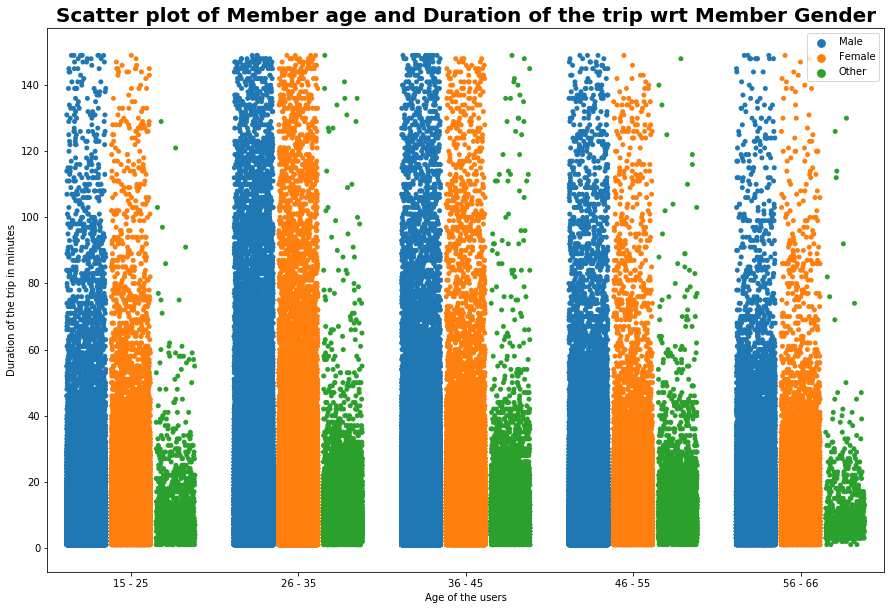

In [8]:
plt.figure(figsize = (15 , 10))

sns.stripplot(x = "age_bins" , y = "duration_min" , hue = "member_gender" ,data = df , jitter = 0.35 , dodge = True ,order=age_order)             
    
plt.xlabel("Age of the users")
plt.ylabel("Duration of the trip in minutes")
plt.legend()
plt.title("Scatter plot of Member age and Duration of the trip wrt Member Gender" , fontweight = "bold" , fontsize = 20)


## Scatter plot of Member gender and Duration of the trip wrt User Type
>Male subscribers tend to take only short duration rides while Male customers tend to take longer duration rides.Female subscribers also tend to take more shorter duration rides and Female customers tend to longer duration rides. Other gender subscribers tend to take longer rides compared to customers of other gender.The reason why most of the subscribers take shorter duration rides can be that most of them use the bike service to ferry around shorter distance between stations or schools.While Customers who are more of a casual user who use the bike service to explore the city or shop around the city,hence taking longer rides

Text(0.5, 1.0, 'Scatter plot of Member gender and Duration of the trip wrt User Type')

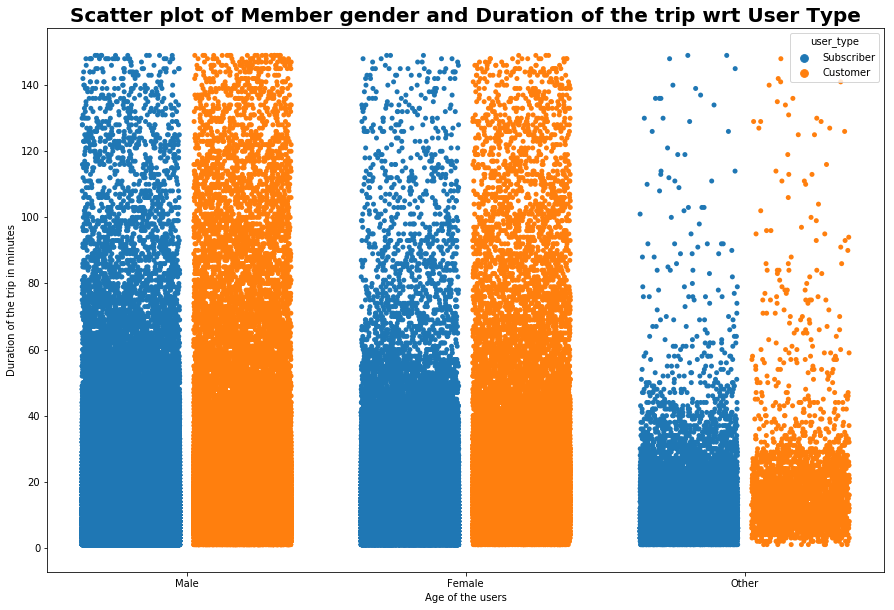

In [9]:
plt.figure(figsize = (15 , 10))

sns.stripplot(x = "member_gender" , y = "duration_min" , data = df ,hue = "user_type",
                jitter = 0.35 , dodge = True )

plt.xlabel("Age of the users")
plt.ylabel("Duration of the trip in minutes")
plt.title("Scatter plot of Member gender and Duration of the trip wrt User Type" , fontweight = "bold" , fontsize = 20)

## Summary

- The Ford GoBike service is very user friendly and popular bike sharing service in San Francisco.The user base of this service is divided into "Customers" and "Subscribers" and the genders are "Male" , "Female" and "Others".The bike sharing service sees the most booking in the month of July and most of it's users are Subscribers.Customers of the bike sharing service are mostly casual users who use the service mostly on weekends to shop or roam around the city.Female users tend to take longer duration of rides, compared to male users

- The univariate , bivariate and multivariate analysis done by me can be leveraged by Ford GoBikes in increasing their customer base and identifying their target audience

In [ ]:
!jupyter nbconvert Communicate_Data_Slide_Deck.ipynb --to slides --post serve --template output_toggle